1


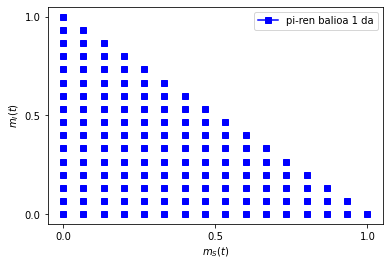

pi:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
from decimal import Decimal, getcontext
getcontext().prec = 9
import matplotlib.pyplot as plt
import numpy as np
import random

def kalkulatu_BR(N,pi,c,delta,gamma,rho,ct):
    S=[]
    for i in range(N+1):
        for j in range(N+1):
            if (i/N+j/N)<=1:
                S.append((i/N,j/N))
    v_0S=np.zeros(len(S))
    v_0I=np.zeros(len(S))
    v_1S=np.zeros(len(S))
    v_1I=np.zeros(len(S))
    for i in range(len(S)):
        v_0S[i]=i
        v_0I[i]=i
    balio1=0
    balio2=1
    cont=0
    pi_0=np.zeros(len(S))
    while cont==0:
        for elem in S:
            if elem[0]==0 and elem[1]==0:
                v_1S[S.index(elem)]=1
                v_1I[S.index(elem)]=c
                pi_0[S.index(elem)]=1
            if elem[0]!=0 and elem[1]==0:
                v_1S[S.index(elem)]=1
                v_1I[S.index(elem)]=c
                pi_0[S.index(elem)]=1
            if elem[0]==0 and elem[1]!=0:
                bektorea=(elem[0],Decimal(elem[1]-int(1/N)))
                v_1I[S.index(elem)]=c+delta*rho*elem[1]*v_0I[S.index(bektorea)]
                fv1=ct-balio1+delta*(gamma*elem[1]*balio1*v_0I[S.index(elem)]+
                                   rho*elem[1]*v_0S[S.index(bektorea)])
                fv2=ct-balio2+delta*(gamma*elem[1]*balio2*v_0I[S.index(elem)]+
                                   rho*elem[1]*v_0S[S.index(bektorea)])
                if fv1<fv2:
                    v_1S[S.index(elem)]=fv1
                    pi_0[S.index(elem)]=balio1
                else:
                    v_1S[S.index(elem)]=fv2
                    pi_0[S.index(elem)]=balio2
            if elem[0]!=0 and elem[1]!=0:
                bektorea=(elem[0],Decimal(elem[1]-int(1/N)))
                bek=(Decimal(elem[0]-int(1/N)),Decimal(elem[1]+int(1/N)))
                v_1I[S.index(elem)]=c+delta*(gamma*elem[1]*pi[S.index(elem)]*v_0I[S.index(bek)]+
                                    rho*elem[1]*v_0I[S.index(bektorea)])
                fv1=ct-balio1+delta*(gamma*elem[1]*balio1*v_0I[S.index(elem)]+
                                    gamma*elem[1]*pi[S.index(elem)]*v_0I[S.index(bek)]+rho*elem[1]*v_0S[S.index(bektorea)])
                fv2=ct-balio2+delta*(gamma*elem[1]*balio2*v_0I[S.index(elem)]+
                                    gamma*elem[1]*pi[S.index(elem)]*v_0I[S.index(bek)]+rho*elem[1]*v_0S[S.index(bektorea)])
                if fv1<fv2:
                    v_1S[S.index(elem)]=fv1
                    pi_0[S.index(elem)]=balio1
                else:
                    v_1S[S.index(elem)]=fv2
                    pi_0[S.index(elem)]=balio2
        if (np.array(v_1I) == np.array(v_0I)).all() and (np.array(v_1S) == np.array(v_0S)).all():
            cont==1
            break
        else:
            pi_0=np.zeros(len(S))
            cont==0
            v_0I=np.array(v_1I)
            v_0S=np.array(v_1S)
            v_1S=np.zeros(len(S))
            v_1I=np.zeros(len(S))
    return pi_0


def pi_berdinak(N,cI):
    alfa=0.8
    S=[]
    for i in range(N+1):
        for j in range(N+1):
            if (i/N+j/N)<=1:
                S.append((i/N,j/N))
    pi=np.zeros(len(S))
    for i in range(len(S)):
        pi[i]=random.randint(0,1)
    cont=0
    while cont<=50:
        pi_0=np.array(kalkulatu_BR(N,pi,cI,0.6,0.6,0.4,2))
        pi_1=np.add(np.multiply(pi_0,alfa),np.multiply((1-alfa),pi))
        #print(pi_0,pi_1)
        if (pi_1 == pi_0).all():
            #print('Sartu da',cont)
            b=0
            a=0
            for elem in S:
                x=elem[0]
                y=elem[1]
                if pi_0[S.index(elem)]==1:
                    if b==0:
                        plt.plot(x,y,marker='s',color='b',label='pi-ren balioa 1 da')
                        b=1
                    else:
                        plt.plot(x,y,marker='s',color='b')
                if pi_0[S.index(elem)]==0:
                    if a==0:
                        plt.plot(x,y,marker='o',color='g',label='pi-ren balioa 0 da')
                        a=1
                    else:
                        plt.plot(x,y,marker='o',color='g')


            plt.xlabel('$m_S(t)$')
            plt.ylabel('$m_I(t)$')
            plt.yticks([0,0.5,1])
            plt.xticks([0,0.5,1])
            plt.legend(loc='upper right')
            plt.show()
            print('pi: ',pi_1)
            break
        else:
            pi=pi_0
            cont+=1
            print(cont)
            
            
pi_berdinak(15,0.01)